# Feminine and Masculine Writing in Japanese Atomic Bomb Literature: Sentiment Analysis

In [7]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [45]:
data_set = pd.read_excel("data\\results without zero values.xlsx")
data_set

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,1,林 京子 - ギヤマン ビードロ,F,112867,-0.011454,-0.054455,-0.010385,-0.044071,No
1,2,林 京子 - 二人の墓標,F,22251,-0.110104,-0.139089,-0.098741,-0.040348,No
2,3,林 京子 - 同期会,F,16390,0.016105,0.142857,0.017386,0.125471,Yes
3,4,林 京子 - 昭和二十年の夏,F,18826,-0.013255,0.500000,-0.015090,0.515090,Yes
4,5,林 京子 - 曇り日の行進,F,17944,-0.008522,0.155556,-0.019675,0.175231,Yes
...,...,...,...,...,...,...,...,...,...
96,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.119351,-0.257576,-0.111784,-0.145792,No
97,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.006504,-0.204678,0.023987,-0.228665,No
98,114,斎木寿夫 - 死者は裁かない,M,17833,-0.130481,-0.121918,-0.128818,0.006900,Yes
99,115,武田 泰淳 - 第一のボタン,M,78975,0.004374,0.045368,-0.023118,0.068487,Yes


In [62]:
data_set.describe()

,Unnamed: 0,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,58.792079,38571.732673,-0.073293,-0.047181,-0.078185,0.031004
std,33.338061,42313.975043,0.088804,0.239847,0.096359,0.240158
min,1.000000,482.000000,-0.367424,-1.000000,-0.466667,-0.999475
25%,31.000000,8428.000000,-0.132768,-0.114540,-0.128818,-0.023190
50%,60.000000,22251.000000,-0.061524,-0.020399,-0.073129,0.022133
75%,87.000000,51383.000000,-0.001000,0.026774,-0.006250,0.102225
max,116.000000,194666.000000,0.113333,1.000000,0.117647,1.076533


## Classification into two clusters

### Data set 1: Overall data

This classification is based on a dataset, from which the pieces without direct speech (102 out of 117). The dataset includes the length of the pieces, sentiment scores for overall speech, direct speech and author's speech, the difference between sentiment score of 

In [47]:
df = data_set[["Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]]
df.corr()

,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment
Overall Sentiment,1.000000,0.410917,0.813179
Direct Speech Sentiment,0.410917,1.000000,0.197643
Author's Speech Sentiment,0.813179,0.197643,1.000000


In [48]:
df = data_set[["Title", "Gender", "Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]]

In [49]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])


C:\Users\Artem\AppData\Local\Temp\ipykernel_21872\1857023162.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = encoder.fit_transform(df['Gender'])


In [50]:
from sklearn.model_selection import train_test_split

X = df[['Direct Speech Sentiment', "Author's Speech Sentiment"]]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [55]:
from sklearn.svm import SVC

# Create and train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [56]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = clf.predict(X_test_scaled)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 0.5714285714285714


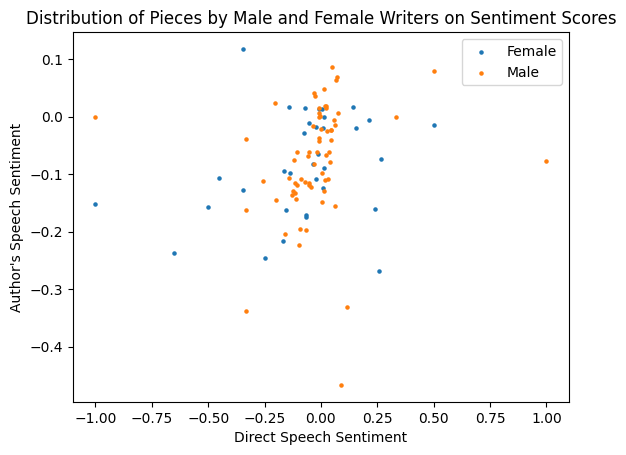

In [76]:
x_female = data_set["Direct Speech Sentiment"][:34]
x_male = data_set["Direct Speech Sentiment"][34:]
y_female = data_set["Author's Speech Sentiment"][:34]
y_male = data_set["Author's Speech Sentiment"][34:]

plt.scatter(x_female, y_female, label='Female', s=5)
plt.scatter(x_male, y_male, label='Male', s=5)

plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")

plt.show()

### Dataset 2: Sentiment Calculated without counting zero sentiment scores of sentences whie counting average sentiment

In [79]:
data_set2 = pd.read_excel("data\\results with dropped zero scores without zero scores.xlsx")
data_set2

,Unnamed: 0,Title,Gender,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value,Exceeds?
0,1,林 京子 - ギヤマン ビードロ,F,112867,-0.027478,-0.054455,-0.025238,-0.029218,No
1,2,林 京子 - 二人の墓標,F,22251,-0.230500,-0.139089,-0.203634,0.064546,Yes
2,3,林 京子 - 同期会,F,16390,0.041546,0.142857,0.045203,0.097654,Yes
3,4,林 京子 - 昭和二十年の夏,F,18826,-0.031272,0.500000,-0.035756,0.535756,Yes
4,5,林 京子 - 曇り日の行進,F,17944,-0.017073,0.155556,-0.039636,0.195192,Yes
...,...,...,...,...,...,...,...,...,...
96,112,大江 健三郎 - ヒロシマ・ノ—卜 7,M,10756,-0.197422,-0.257576,-0.188040,-0.069536,No
97,113,大江 健三郎 - 核状況のカナリア理論,M,16313,0.009970,-0.204678,0.037979,-0.242658,No
98,114,斎木寿夫 - 死者は裁かない,M,17833,-0.353362,-0.121918,-0.351449,0.229531,Yes
99,115,武田 泰淳 - 第一のボタン,M,78975,0.008466,0.045368,-0.041310,0.086679,Yes


In [80]:
data_set2.describe()

,Unnamed: 0,Length in characters,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment,Difference Value
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,58.792079,38571.732673,-0.141198,-0.047181,-0.155128,0.107947
std,33.338061,42313.975043,0.166724,0.239847,0.184308,0.273690
min,1.000000,482.000000,-0.534722,-1.000000,-0.733333,-0.999273
25%,31.000000,8428.000000,-0.250170,-0.114540,-0.262875,-0.015344
50%,60.000000,22251.000000,-0.151236,-0.020399,-0.164056,0.094141
75%,87.000000,51383.000000,-0.002416,0.026774,-0.013366,0.239627
max,116.000000,194666.000000,0.226667,1.000000,0.250000,1.164056


In [81]:
data_set2[["Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]].corr()

,Overall Sentiment,Direct Speech Sentiment,Author's Speech Sentiment
Overall Sentiment,1.000000,0.361573,0.842803
Direct Speech Sentiment,0.361573,1.000000,0.187642
Author's Speech Sentiment,0.842803,0.187642,1.000000


In [82]:
df = data_set2[["Title", "Gender", "Overall Sentiment", "Direct Speech Sentiment", "Author's Speech Sentiment"]]

In [83]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

C:\Users\Artem\AppData\Local\Temp\ipykernel_21872\2356266226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = encoder.fit_transform(df['Gender'])


In [84]:
from sklearn.model_selection import train_test_split

X = df[['Direct Speech Sentiment', "Author's Speech Sentiment"]]
y = df['Gender']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
from sklearn.svm import SVC

# Create and train the SVM classifier
clf = SVC(kernel='linear')
clf.fit(X_train_scaled, y_train)


SVC(kernel='linear')

In [87]:
from sklearn.metrics import accuracy_score

# Making predictions
y_pred = clf.predict(X_test_scaled)

# Evaluating the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.5714285714285714


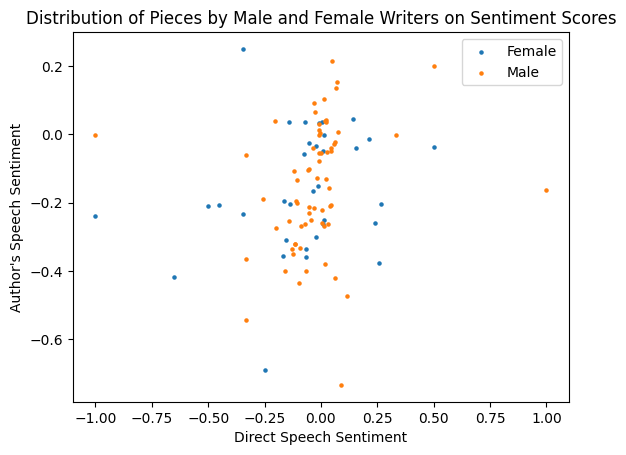

In [88]:
x_female = data_set2["Direct Speech Sentiment"][:34]
x_male = data_set2["Direct Speech Sentiment"][34:]
y_female = data_set2["Author's Speech Sentiment"][:34]
y_male = data_set2["Author's Speech Sentiment"][34:]

plt.scatter(x_female, y_female, label='Female', s=5)
plt.scatter(x_male, y_male, label='Male', s=5)

plt.legend()
plt.title('Distribution of Pieces by Male and Female Writers on Sentiment Scores')
plt.xlabel('Direct Speech Sentiment')
plt.ylabel("Author's Speech Sentiment")

plt.show()